<a href="https://colab.research.google.com/github/Riddhi-14/Assessments/blob/main/CNNSIMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2093 - accuracy: 0.9416 - val_loss: 0.0976 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0773 - accuracy: 0.9779 - val_loss: 0.0613 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0547 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0602 -

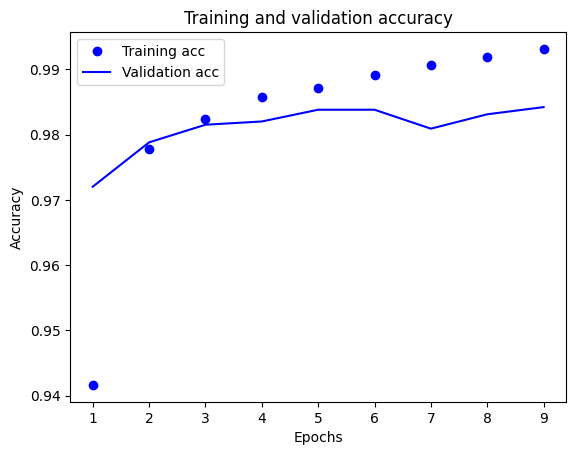

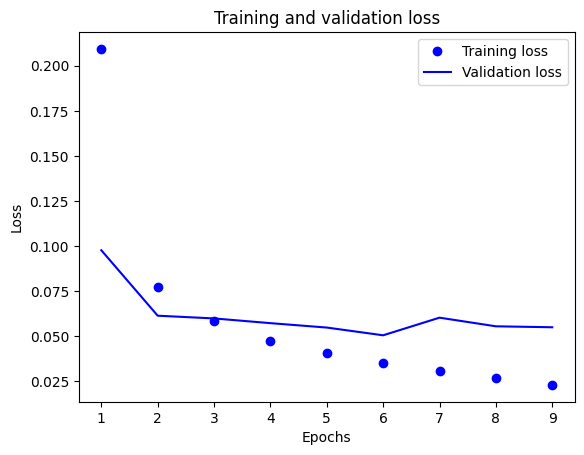

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = (train_images / 255.0) - 0.5
test_images = (test_images / 255.0) - 0.5

# Reshape images to (28, 28, 1) for Conv2D layer
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CSV Logger callback
csv_logger = CSVLogger("model_history_log.csv", append=True)

# Early stopping callback
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[csv_logger, callback_earlystop],
)

# Print model summary
model.summary()

# Save the model
model.save_weights('cnn_mnist.h5')

# Load the model's saved weights
model.load_weights('cnn_mnist.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy on Test Data: {accuracy}")

# Plot training and validation accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
